<a href="https://colab.research.google.com/github/aueskinj/Data-Science-Projects/blob/main/FineTuningEngSwaModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries
In this cell, we import necessary libraries for our task. TensorFlow and Keras are used for model building and training. Matplotlib and Seaborn are used for data visualization. Numpy is used for numerical operations. Sklearn metrics are used for model evaluation.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


# Load and Preprocess the Dataset
In this cell, we load the CIFAR-10 dataset, which is a standard dataset for image classification in the field of machine learning. We also normalize the images and convert the labels to one-hot encoded vectors for training.



In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 [==============================] - 12s 0us/step


# Data Augmentation
To improve the model's ability to generalize, we apply data augmentation techniques such as random rotation, width and height shift, horizontal flip, and zoom on the training data.


In [ ]:
# Data augmentation; Basically mixing the data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

datagen.fit(x_train)


# Build the CNN Model
Here, we construct a Convolutional Neural Network (CNN) using Keras. The model includes convolutional layers, max pooling layers, dropout layers for regularization, and a fully connected layer for classification.


In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),#relu helps with us not going offroad
    MaxPooling2D((2, 2)),#in this boxes, each box has 255, each category is broken into 3x3, and it takes the max pixel, the one with the highest color is taken and rest left out. The picked ones are the ones passed into the max pooling to 2X2
    Dropout(0.25),#first layer...

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),#second layer

    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')#closed up denser layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#adam is an optimiser, we use adam as this is a classification problem

# Train the Model
In this cell, we train the CNN model using the training data. We use the augmented data generator for training and set aside a portion of the training data for validation.


In [ ]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1562/1562 [==============================] - 39s 21ms/step - loss: 1.8202 - accuracy: 0.3211 - val_loss: 1.4332 - val_accuracy: 0.4782
Epoch 2/10
1562/1562 [==============================] - 31s 20ms/step - loss: 1.5767 - accuracy: 0.4257 - val_loss: 1.3793 - val_accuracy: 0.5126
Epoch 3/10
1562/1562 [==============================] - 32s 21ms/step - loss: 1.4820 - accuracy: 0.4658 - val_loss: 1.1820 - val_accuracy: 0.5833
Epoch 4/10
1562/1562 [==============================] - 33s 21ms/step - loss: 1.4251 - accuracy: 0.4906 - val_loss: 1.2534 - val_accuracy: 0.5518
Epoch 5/10
1562/1562 [==============================] - 32s 20ms/step - loss: 1.3851 - accuracy: 0.5038 - val_loss: 1.1047 - val_accuracy: 0.6157
Epoch 6/10
1562/1562 [==============================] - 32s 20ms/step - loss: 1.3604 - accuracy: 0.5136 - val_loss: 1.0782 - val_accuracy: 0.6233
Epoch 7/10
1562/1562 [==============================] - 32s 20ms/step - loss: 1.3402 - accuracy: 0.5218 - val_loss: 1.1318 -

# Evaluate the Model
We evaluate the model's performance on the test dataset and display the accuracy and loss during training and validation. We also use a confusion matrix and classification report for detailed evaluation.


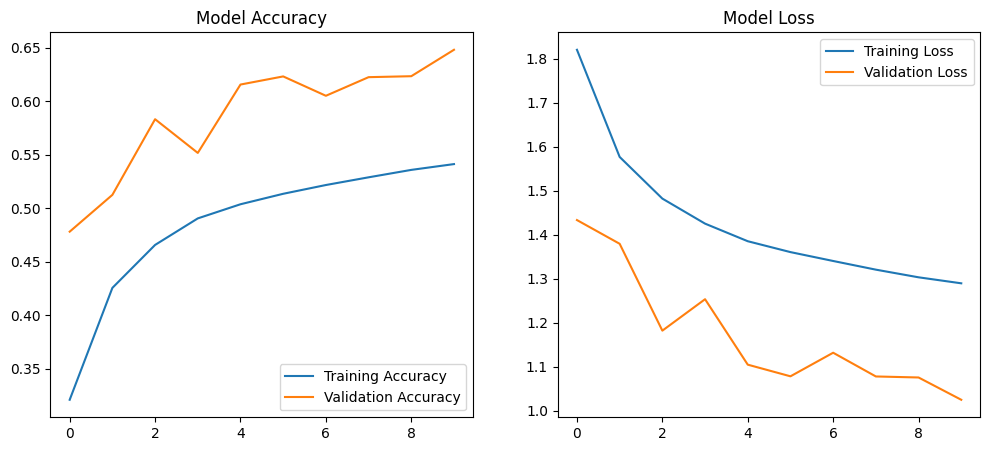

313/313 [==============================] - 1s 2ms/step


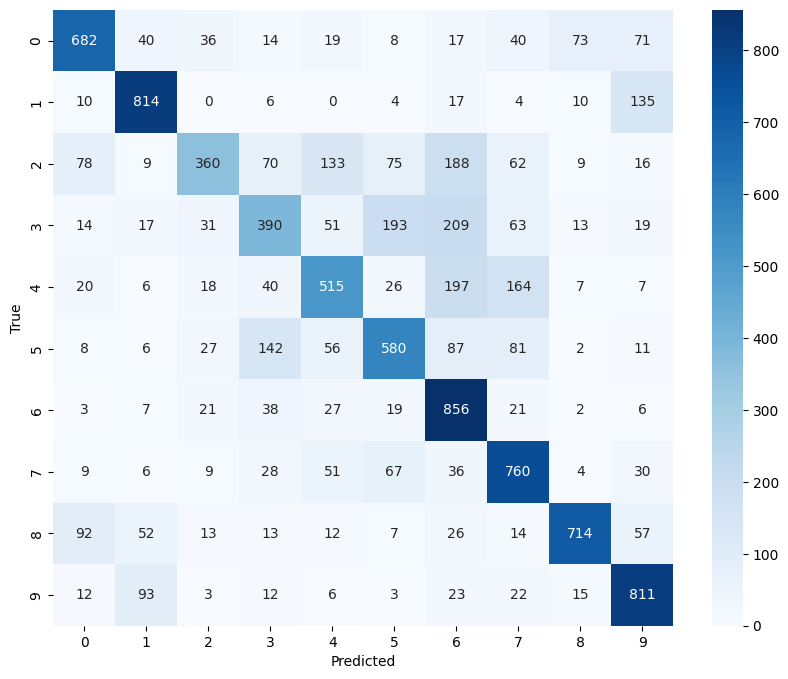

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      1000
           1       0.78      0.81      0.79      1000
           2       0.69      0.36      0.47      1000
           3       0.52      0.39      0.44      1000
           4       0.59      0.52      0.55      1000
           5       0.59      0.58      0.59      1000
           6       0.52      0.86      0.64      1000
           7       0.62      0.76      0.68      1000
           8       0.84      0.71      0.77      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.64     10000
weighted avg       0.66      0.65      0.64     10000



In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))#(x, y)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Confusion Matrix and Classification Report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('Classification Report:')
print(classification_report(y_true, y_pred_classes))


# Save the Model
Finally, we save the trained model for future use. This allows us to load the model later and use it for predictions without needing to retrain it.


In [ ]:
# Save the trained model
model.save('cifar10_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
